In [1]:
import numpy as np
import pandas as pd
import os 
import cv2 as cv2
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, GlobalAveragePooling2D, Dropout
import seaborn as sns

In [2]:
from zipfile import ZipFile

In [ ]:
with ZipFile('/content/drive/MyDrive/Breast Cancer Detector.zip', 'r') as zipObj:
  zipObj.extractall('/content/drive/MyDrive/Breast Cancer Detector')

In [8]:
dataset = r"/content/drive/MyDrive/Breast Cancer Detector/Breast Cancer Detector"
no_path = r"/content/drive/MyDrive/Breast Cancer Detector/Breast Cancer Detector/Datasets/0"

yes_path = r"/content/drive/MyDrive/Breast Cancer Detector/Breast Cancer Detector/Datasets/1"

In [21]:
print(no_path)

/content/drive/MyDrive/Breast Cancer Detector/Breast Cancer Detector/Datasets/0


In [28]:
vals = [yes_path, no_path]
classes = ['yes', 'no']
filepath = []
labels = []
for i, j in zip(vals, classes):
  filelist = os.listdir(i)
  print(filelist)
  for name in filelist:
    x = os.path.join(i,name)
    filepath.append(x)
    labels.append(j)
print(filepath.__len__(), labels.__len__())  

['9023_idx5_x1301_y1351_class1.png', '9023_idx5_x1301_y1401_class1.png', '9023_idx5_x1301_y1451_class1.png', '9023_idx5_x1301_y1501_class1.png', '9023_idx5_x1301_y1551_class1.png', '9023_idx5_x1301_y1601_class1.png', '9023_idx5_x1301_y1651_class1.png', '9023_idx5_x1301_y1751_class1.png', '9023_idx5_x1301_y1801_class1.png', '9023_idx5_x1301_y1851_class1.png', '9023_idx5_x1301_y1901_class1.png', '9023_idx5_x1301_y1951_class1.png', '9023_idx5_x1351_y1301_class1.png', '9023_idx5_x1351_y1351_class1.png', '9023_idx5_x1351_y1401_class1.png', '9023_idx5_x1351_y1451_class1.png', '9023_idx5_x1351_y1501_class1.png', '9023_idx5_x1351_y1551_class1.png', '9023_idx5_x1351_y1601_class1.png', '9023_idx5_x1351_y1651_class1.png', '9023_idx5_x1351_y1701_class1.png', '9023_idx5_x1351_y1751_class1.png', '9023_idx5_x1351_y1801_class1.png', '9023_idx5_x1351_y1851_class1.png', '9023_idx5_x1351_y1901_class1.png', '9023_idx5_x1351_y1951_class1.png', '9023_idx5_x1351_y2001_class1.png', '9023_idx5_x1351_y2051_clas

In [29]:
filepath[0:5]

['/content/drive/MyDrive/Breast Cancer Detector/Breast Cancer Detector/Datasets/1/9023_idx5_x1301_y1351_class1.png',
 '/content/drive/MyDrive/Breast Cancer Detector/Breast Cancer Detector/Datasets/1/9023_idx5_x1301_y1401_class1.png',
 '/content/drive/MyDrive/Breast Cancer Detector/Breast Cancer Detector/Datasets/1/9023_idx5_x1301_y1451_class1.png',
 '/content/drive/MyDrive/Breast Cancer Detector/Breast Cancer Detector/Datasets/1/9023_idx5_x1301_y1501_class1.png',
 '/content/drive/MyDrive/Breast Cancer Detector/Breast Cancer Detector/Datasets/1/9023_idx5_x1301_y1551_class1.png']

In [30]:
labels[0:5]


['yes', 'yes', 'yes', 'yes', 'yes']

In [31]:
labels[-5:]

['no', 'no', 'no', 'no', 'no']

In [32]:
datazipping =list(zip(filepath, labels))
pathframe = pd.DataFrame(datazipping, columns=['filepath', 'labels'])

In [33]:
pathframe.head()


,filepath,labels
0,/content/drive/MyDrive/Breast Cancer Detector/...,yes
1,/content/drive/MyDrive/Breast Cancer Detector/...,yes
2,/content/drive/MyDrive/Breast Cancer Detector/...,yes
3,/content/drive/MyDrive/Breast Cancer Detector/...,yes
4,/content/drive/MyDrive/Breast Cancer Detector/...,yes


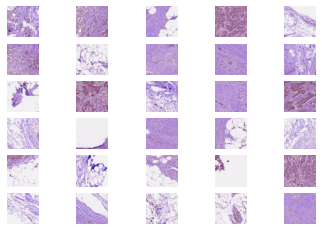

In [34]:
for i in range (0, 30):
  vals = np.random.randint(1, len(pathframe))
  plt.subplot(6,5, i+1)
  plt.imshow(cv2.imread(pathframe.filepath[vals]))
  plt.axis('off')
plt.show()  

In [35]:
Train, Test = train_test_split(pathframe, train_size = 0.90, random_state=42)
Train_new, valid = train_test_split(Train, train_size=0.90 ,random_state=42)
print(Train.shape, Train_new.shape, valid.shape, Test.shape)

(783, 2) (704, 2) (79, 2) (88, 2)


In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [37]:
train_datagen = ImageDataGenerator(rescale=1/255, rotation_range=40,  width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, vertical_flip =True)

test_datagen = ImageDataGenerator(rescale=1/255)

In [39]:
train_gen =  train_datagen.flow_from_dataframe(dataframe=Train_new, x_col='filepath', y_col='labels', batch_size=16, target_size=(200, 200) , class_mode='binary', shuffle=True)
test_gen = test_datagen.flow_from_dataframe(dataframe=Test, x_col='filepath', y_col='labels', batch_size=16, target_size=(200,200), class_mode='binary', shuffle=True )
valid_gen = train_datagen.flow_from_dataframe(dataframe=valid, x_col='filepath', y_col='labels', batch_size=16, target_size=(200,200), class_mode='binary', shuffle=True)

Found 704 validated image filenames belonging to 2 classes.
Found 88 validated image filenames belonging to 2 classes.
Found 79 validated image filenames belonging to 2 classes.


In [40]:
print(train_gen[0][0].shape)

(16, 200, 200, 3)


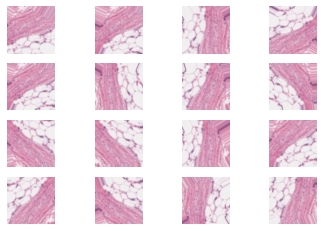

In [41]:
for i in range (0,16):
  val = train_gen[0][0][0]
  vals = val.astype('uint8')
  plt.subplot(4,4,i+1)
  plt.imshow(val)
  plt.axis('off')
plt.show()  

In [42]:
base_moodel = tf.keras.applications.InceptionResNetV2(input_shape = (200,200,3), include_top=False)
model = Sequential()
model.add(base_moodel)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

219070464/219055592 [==============================] - 1s 0us/step


In [43]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience =2, min_delta=0.01)


In [46]:
model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
model.fit(train_gen, validation_data=valid_gen, epochs=5, verbose=1)

Epoch 1/5
44/44 [==============================] - 590s 13s/step - loss: 0.3236 - accuracy: 0.8878 - val_loss: 17.7093 - val_accuracy: 0.3924
Epoch 2/5
44/44 [==============================] - 555s 13s/step - loss: 0.2067 - accuracy: 0.9261 - val_loss: 1.2306 - val_accuracy: 0.6076
Epoch 3/5
44/44 [==============================] - 555s 13s/step - loss: 0.1956 - accuracy: 0.9261 - val_loss: 33.1184 - val_accuracy: 0.3797
Epoch 4/5
44/44 [==============================] - 555s 13s/step - loss: 0.1741 - accuracy: 0.9290 - val_loss: 218.8542 - val_accuracy: 0.8987
Epoch 5/5
44/44 [==============================] - 555s 13s/step - loss: 0.1532 - accuracy: 0.9432 - val_loss: 6.4273 - val_accuracy: 0.7595


In [54]:
model.evaluate(test_gen)

6/6 [==============================] - 15s 2s/step - loss: 13.7630 - accuracy: 0.7273


[13.762961387634277, 0.7272727489471436]